In [1]:
from merra2_assistant.main import load_merra2_sample, get_subregion
import yt 
import numpy as np

In [30]:
bbox_dict = {'altitude':[0, 68*1e3], 
             'latitude': [15, 55],
             'longitude': [-150., -110.]}
dsx0, ds_yt, gc = load_merra2_sample(bbox_dict=bbox_dict, 
                                 virtual_alt_scale=20., 
                                 grid_resolution = (16,)*3,
                                 refine_max_iters=2000,
                                 refine_min_grid_size=4,
                                 refine_by=8,
                                 fill_value = 0.0)
dsx0_sub = get_subregion(dsx0, bbox_dict)

yt_xarray : [INFO ] 2024-05-01 20:48:34,040:  Creating image mask for grid decomposition.
yt_xarray : [INFO ] 2024-05-01 20:48:34,172:  Decomposing image mask and building yt dataset.
yt_xarray : [INFO ] 2024-05-01 20:48:34,181:  Decomposed into 211 grids after 262 iterations.


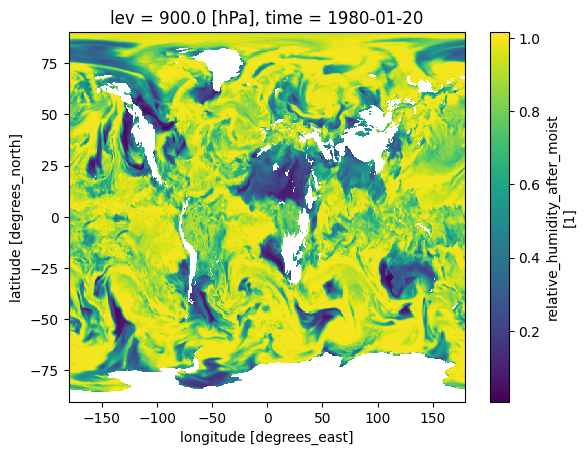

In [31]:
dsx0.RH.isel({'lev':4}).plot()

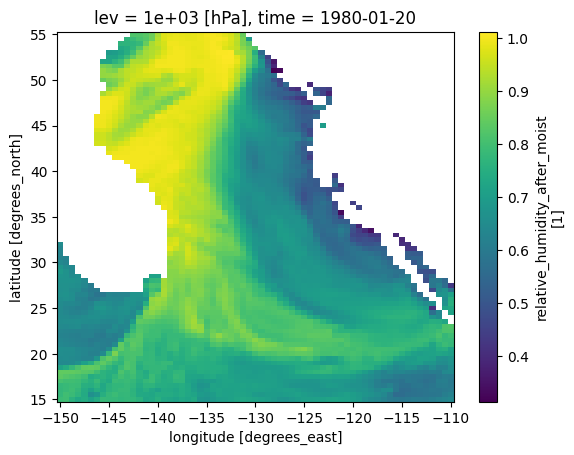

In [32]:
dsx0_sub.RH.isel({'lev':0}).plot()

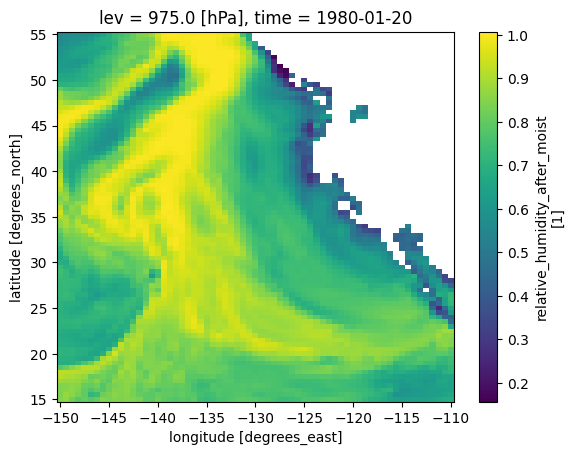

In [33]:
dsx0_sub.RH.isel({'lev':1}).plot()

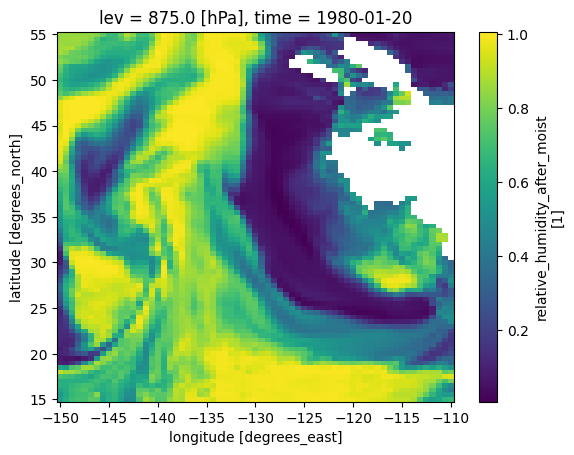

In [34]:
dsx0_sub.RH.isel({'lev':5}).plot()

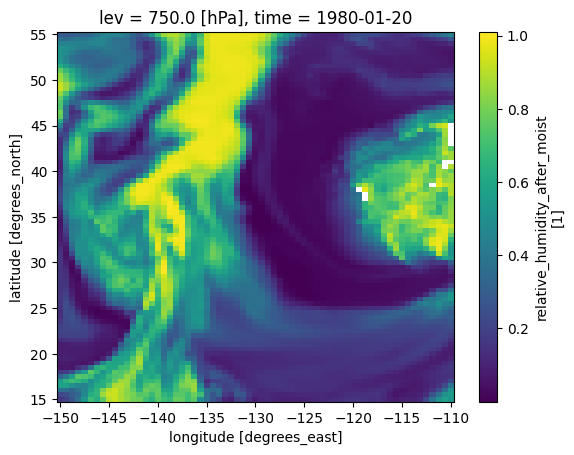

In [35]:
dsx0_sub.RH.isel({'lev':10}).plot()

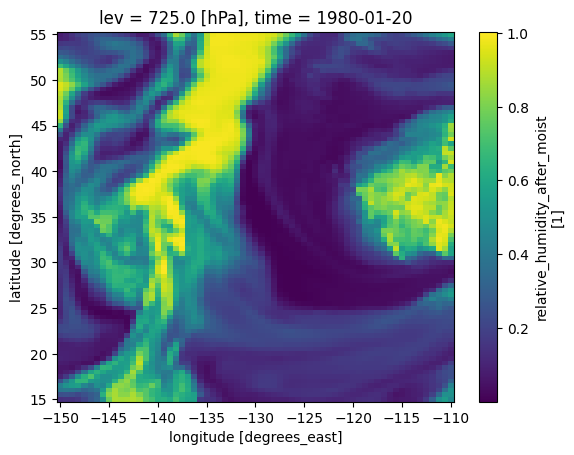

In [36]:
dsx0_sub.RH.isel({'lev':11}).plot()


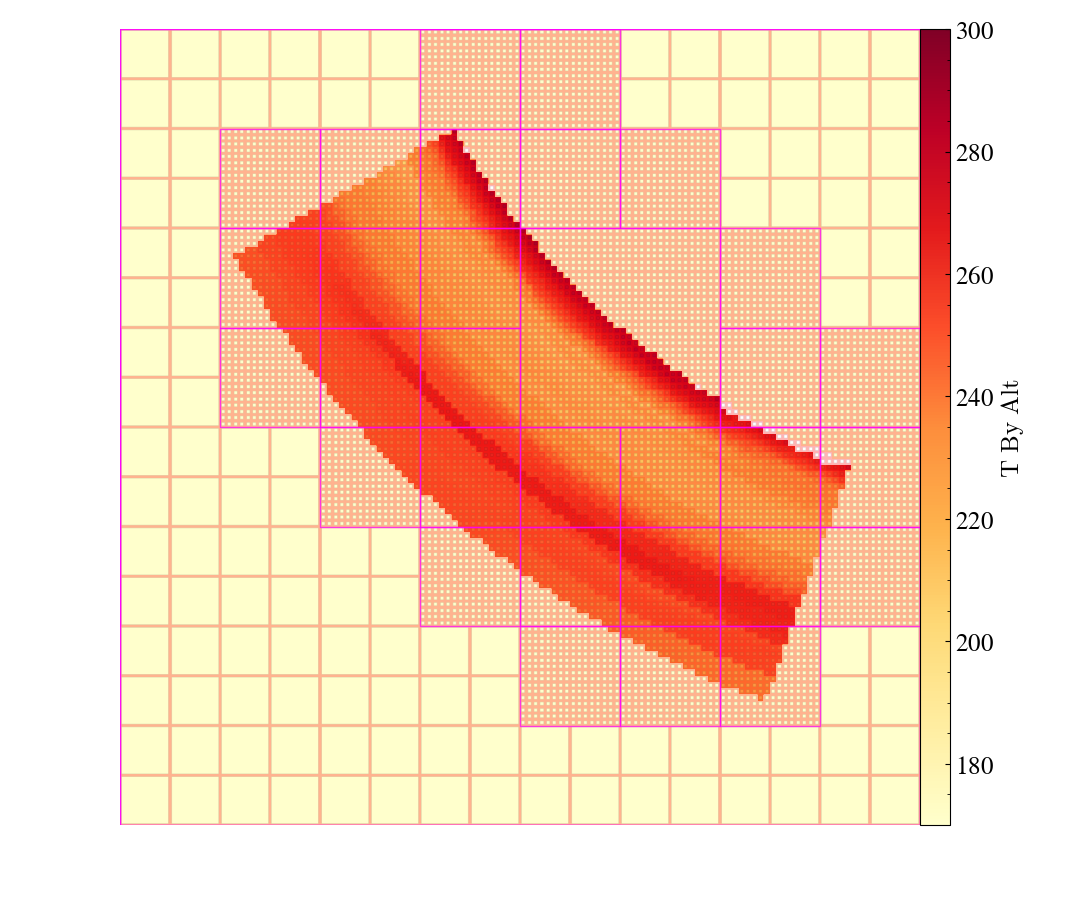

In [37]:
slc = yt.SlicePlot(ds_yt, 'z', 'T_by_alt')
slc.set_log('T_by_alt', False)
slc.annotate_cell_edges(color=(1,0,0), alpha=0.3)
slc.annotate_grids(edgecolors=(1,0,1,1))
slc.set_zlim('T_by_alt', 170, 300)
slc.set_cmap('T_by_alt', 'YlOrRd')
slc.render()
axs = slc.plots['T_by_alt'].figure.axes
axs[0].set_axis_off()
slc.show()


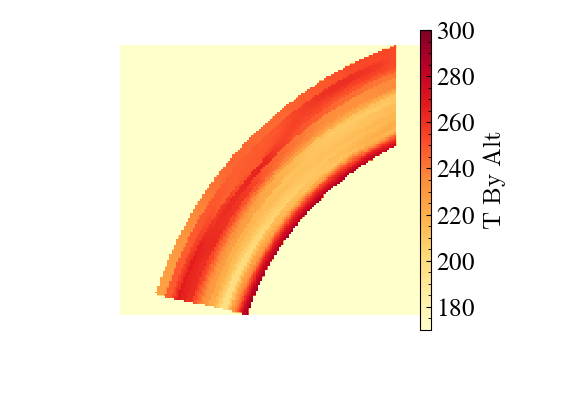


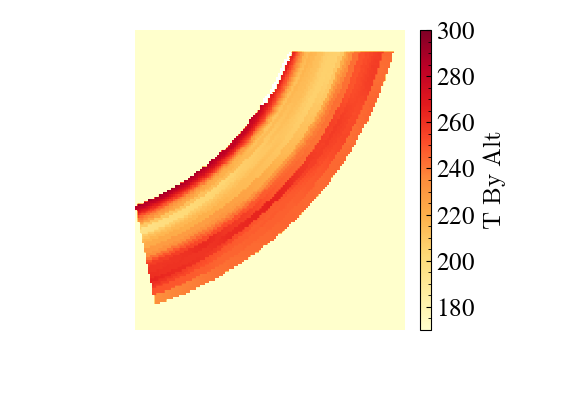


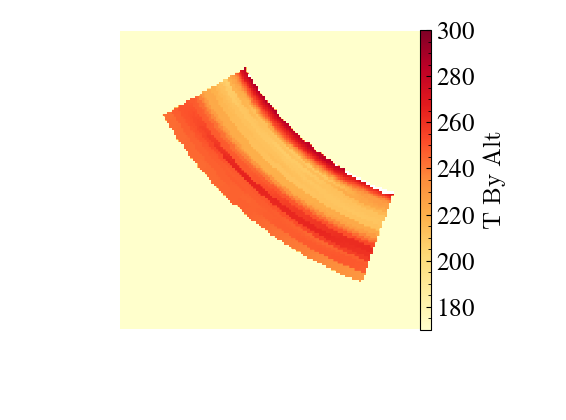

In [38]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'T_by_alt', window_size=(3,3), buff_size=(400,400))    
    slc.set_log('T_by_alt', False)
    slc.set_zlim('T_by_alt', 170, 300)
    slc.set_cmap('T_by_alt', 'YlOrRd')
    slc.render()
    axs = slc.plots['T_by_alt'].figure.axes
    axs[0].set_axis_off()    
    slc.show()


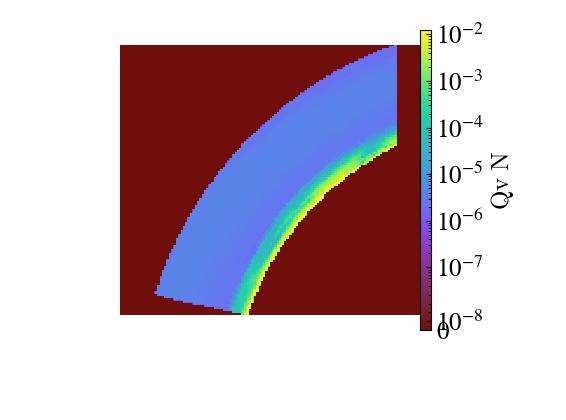


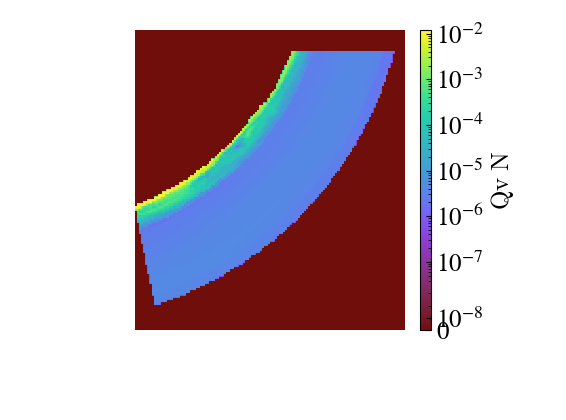


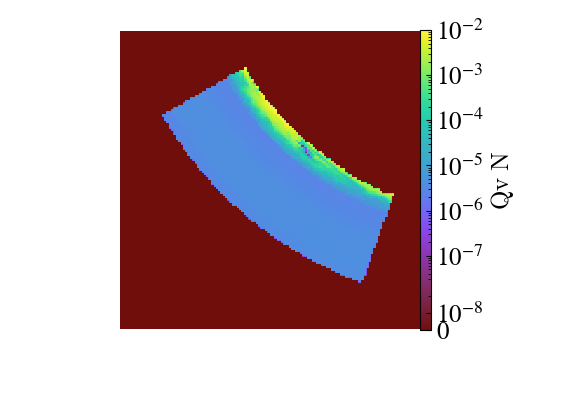

In [39]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'QV_n', window_size=(3,3), buff_size=(400,400))    
    slc.render()
    axs = slc.plots['QV_n'].figure.axes
    axs[0].set_axis_off()
    slc.show()


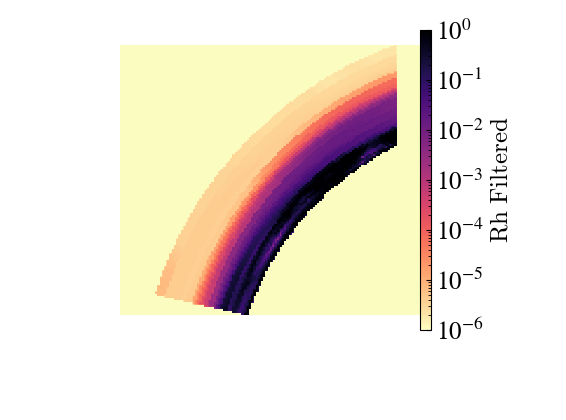


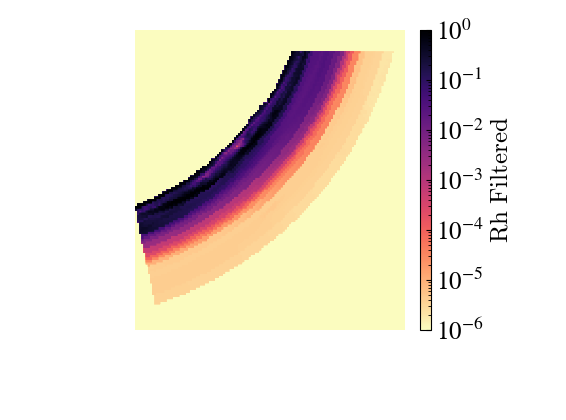


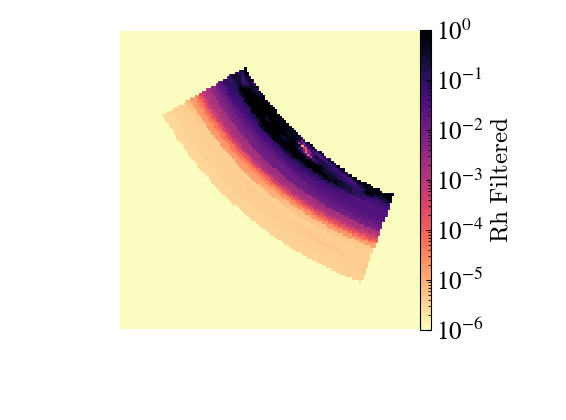

In [40]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'RH_filtered', 
                       window_size=(3,3), buff_size=(400,400))                       
    slc.set_zlim('RH_filtered', 1e-6, 1)
    slc.set_cmap('RH_filtered', 'magma_r')
    slc.render()
    axs = slc.plots['RH_filtered'].figure.axes
    axs[0].set_axis_off()    
    slc.show()


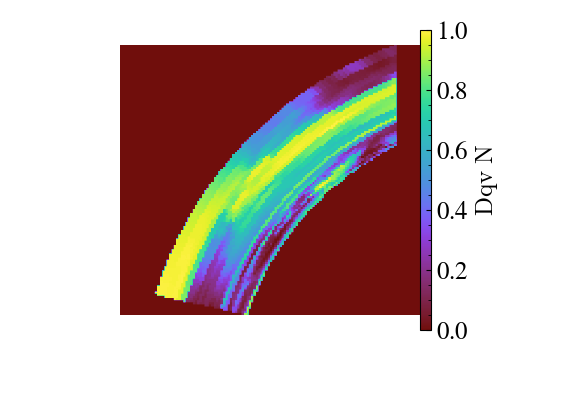


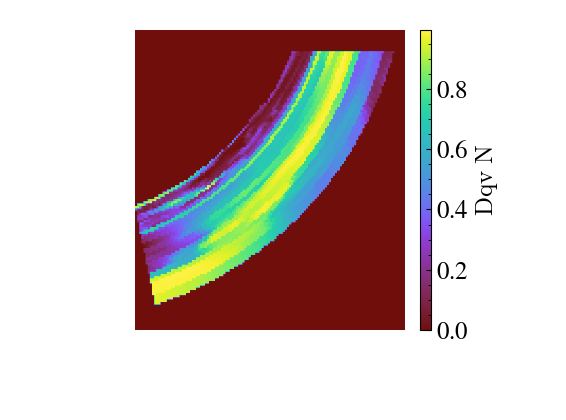


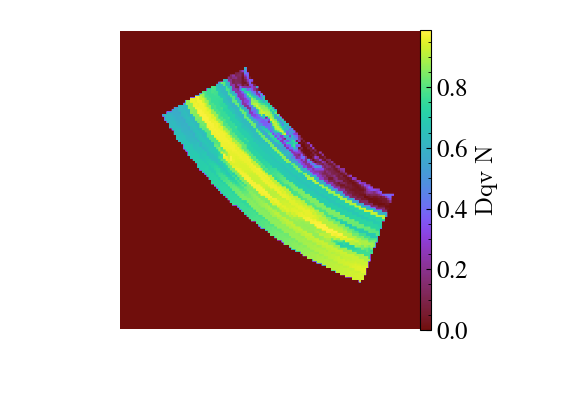

In [41]:
for dim in 'xyz':
    slc = yt.SlicePlot(ds_yt, dim, 'dQV_n', window_size=(3,3), buff_size=(400,400))
    slc.set_log('dQV_n', False)
    slc.render()
    axs = slc.plots['dQV_n'].figure.axes
    axs[0].set_axis_off()
    slc.show()

In [42]:
from merra2_assistant.main import create_RH_vr, build_state_line_sources
sc = create_RH_vr(ds_yt, gc, skip_render=True)

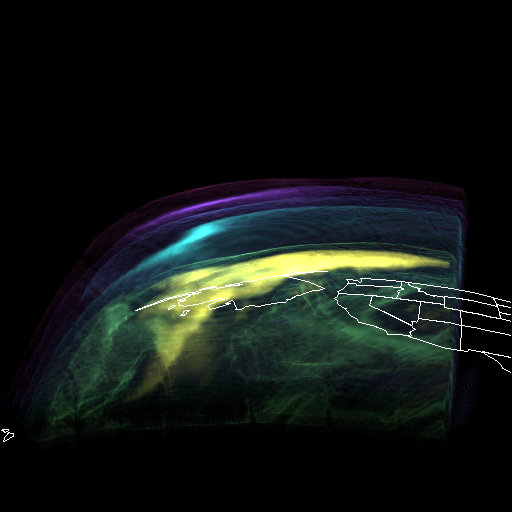

In [43]:
sc.show(sigma_clip=3.5)

![](volume_rendering_images/transfer_function.png)

In [44]:
sc = create_RH_vr(ds_yt, gc, nframes=4)